In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

### Huron River: TP

In [2]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
location = (41.362032, -82.562388)
# location = (41.388294, -82.326747)

In [401]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total")]
df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2088, 63)

In [131]:
map = folium.Map(location=location,
                 zoom_start=12,
                 tiles='https://tile.thunderforest.com/landscape/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

map

In [129]:
map = folium.Map(location=location,
                 zoom_start=12,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

map

In [130]:
map = folium.Map(location=location,
                 zoom_start=12,
                 tiles='https://tile.thunderforest.com/cycle/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

map

In [193]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=11.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# r_stations = stations[(stations.LatitudeMeasure>location[0]-0.2) & (stations.LatitudeMeasure<location[0]+0.2) &
#                      (stations.LongitudeMeasure>location[1]-0.2) & (stations.LongitudeMeasure<location[1]+0.2)]

# for ind, st in r_stations.iterrows():
#     folium.Marker(location=[st.LatitudeMeasure, st.LongitudeMeasure], popup=folium.Popup(html=st.MonitoringLocationIdentifier,show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')).add_to(m)


Show_IDS = [["21OHIO_WQX-K01W31", False],
            ["21OHIO_WQX-K01E05", False],
            ["21OHIO_WQX-K01W32", False],
            ["21OHIO_WQX-K01P01", False],
            ["21OHIO_WQX-K01K02", False],
            ["21OHIO_WQX-K01S04", False],
            ["21OHIO_WQX-K01W33", False],
            ["21OHIO_WQX-501040", False],
            ["21OHIO_WQX-K01K03", False],
            ["21OHIO_WQX-K01K04", False],
            ["21OHIO_WQX-501050", False],
            ["21OHIO_WQX-501030", False],
            ["USGS-04199000", False],
            ["USGS-93912004300558", False],
            ["21OHIO_WQX-K01W01", False],
            ["21OHIO_WQX-K01G16", False]]
# #

Show_IDS = [["21OHIO_WQX-K01E05", False],
            ["21OHIO_WQX-501030", True],
            ["USGS-04199000", True],
            ["21OHIO_WQX-K01G16", False]]


for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=20, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index==1:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.003],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt">{}</div>'.format(index+1),
            )
        ).add_to(m)

# discarge_st = [["USGS-04195820", True]]
# for ind, st_dic in enumerate(discarge_st):
#     print(st)
#     st = st_dic[0]
#     if st_dic[1]:
#         clr='#f44242'
#     else:
#         clr='#0b15c4'
#     icon_number = BeautifyIcon(
#     border_color=clr,
#     text_color=clr,
#     number=index+2,
#     inner_icon_style='margin-top:0;')
#     st_df = stations[stations.MonitoringLocationIdentifier == st]
#     folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                             st_df.LongitudeMeasure.values[0]], 
#                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0].split("-")[-1],show=False, max_width=10), 
#                   icon=icon_number).add_to(m)
    
# minimap = MiniMap(width=120, height=80, zoom_level_offset=-6, tile_layer = "stamenwatercolor")
# m.add_child(minimap)
m



21OHIO_WQX-K01E05
21OHIO_WQX-501030
USGS-04199000
21OHIO_WQX-K01G16


In [133]:
url

'https://api.mapbox.com/v4/mapbox.mapbox-light/11/41.362032/-82.562388@2x.png?access_token=pk.eyJ1IjoicHljY2t1dSIsImEiOiJjam9yMXF1OTgwYTZpM3NtMm8xZHhjd3NrIn0.uenM3JbKKTgeCVcFNoWM-A'

In [105]:
all_stations = [s[0] for s in Show_IDS]

In [106]:
WQP_name = "Phosphorus"

ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples.zip').open(name='result.csv'))


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(all_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,23,24,25,30,33,35,37,39,40,41,42,43,44,48,49,50,54,55,56,57,58,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

(121, 63)

In [405]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Vermilion_River_data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(13867, 67)

In [406]:
pt = sns.color_palette("colorblind", len(Show_IDS))

In [108]:
all_stations

['21OHIO_WQX-K01E05',
 '21OHIO_WQX-501030',
 'USGS-04199000',
 '21OHIO_WQX-K01G16']

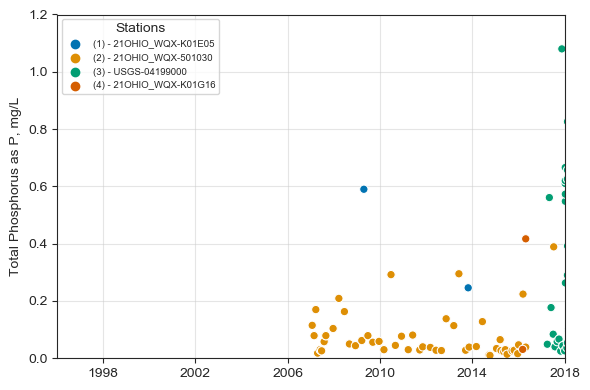

In [399]:
river='Huron_R_OH'
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=all_stations, hue='MonitoringLocationIdentifier', palette=pt)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(all_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,1.2)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [255]:
Show_IDS

[['21OHIO_WQX-K01E05', False],
 ['21OHIO_WQX-501030', True],
 ['USGS-04199000', True],
 ['21OHIO_WQX-K01G16', False]]

In [258]:
master_stations = [st[0] for st in Show_IDS if st[1]]
master_stations

['21OHIO_WQX-501030', 'USGS-04199000']

In [265]:
sp.head().columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName',
       'ActivityMediaSubdivisionName', 'ActivityStartDate',
       'ActivityStartTime/Time', 'ActivityStartTime/TimeZoneCode',
       'ActivityEndDate', 'ActivityEndTime/Time',
       'ActivityEndTime/TimeZoneCode',
       'ActivityDepthHeightMeasure/MeasureValue',
       'ActivityDepthHeightMeasure/MeasureUnitCode',
       'ActivityDepthAltitudeReferencePointText',
       'ActivityTopDepthHeightMeasure/MeasureValue',
       'ActivityTopDepthHeightMeasure/MeasureUnitCode',
       'ActivityBottomDepthHeightMeasure/MeasureValue',
       'ActivityBottomDepthHeightMeasure/MeasureUnitCode', 'ProjectIdentifier',
       'ActivityConductingOrganizationText', 'MonitoringLocationIdentifier',
       'ActivityCommentText', 'SampleAquifer', 'HydrologicCondition',
       'HydrologicEvent', 'SampleCollectionMethod/MethodIdentifier',
       'SampleCollectionMethod/MethodIden

In [267]:
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)][['ActivityStartDate','USGSPCode', 'ResultMeasureValue']]

In [269]:
master_st_df['USGSPCode'] = 0

In [274]:
master_st_df.to_csv('One_by_one/Western/US/'+river+'/TP_'+river+'_data.csv', index=False)

In [200]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(all_stations).round(2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
MonitoringLocationIdentifier &        &       &       &       &       &       &       &       \\
\midrule
21OHIO\_WQX-K01E05            &    2.0 &  0.42 &  0.24 &  0.25 &  0.33 &  0.42 &  0.50 &  0.59 \\
21OHIO\_WQX-501030            &   54.0 &  0.08 &  0.08 &  0.01 &  0.03 &  0.04 &  0.08 &  0.39 \\
USGS-04199000                &   61.0 &  0.41 &  0.37 &  0.02 &  0.07 &  0.40 &  0.60 &  1.58 \\
21OHIO\_WQX-K01G16            &    2.0 &  0.22 &  0.27 &  0.03 &  0.13 &  0.22 &  0.32 &  0.42 \\
\bottomrule
\end{tabular}



### Discharge

In [207]:
# Finde station here:
# https://www.hydrocloud.org
site = '04199000'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [208]:
discharge.columns

Index(['USGS:04199000:00060:00003', 'USGS:04199000:00060:00003_qualifiers'], dtype='object')

In [209]:
discharge['Flow, CFS']=discharge['USGS:04199000:00060:00003']

In [210]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-04199000'

In [211]:
discharge[discharge.Source=='USGS-04199000'][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

In [212]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

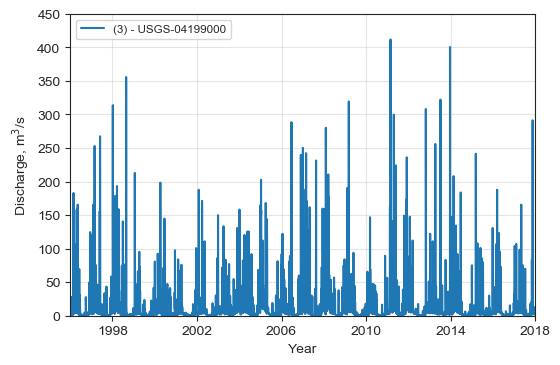

In [348]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(3) - USGS-04199000'], loc=2, fontsize='small')
ax.set_ylim(0,450)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [277]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [280]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Huron_R_OH/EGRET Result/TP/Huron_River_OH_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Huron_R_OH/EGRET Result/TP/Huron_River_OH_TP_Sample.csv')


In [281]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


In [283]:
river = 'Huron_R_OH'

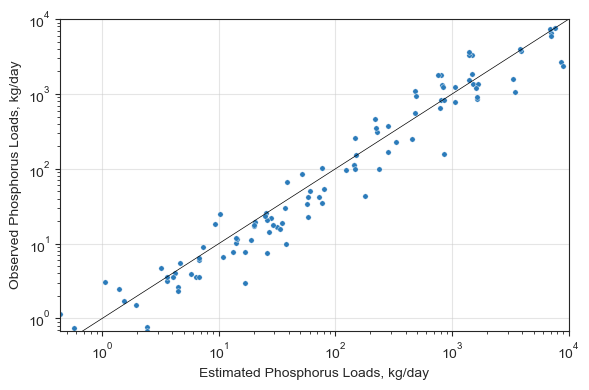

In [285]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000],[-100,100000], 'k', lw=0.5)
plt.xlim(0,10_000)
plt.ylim(0,10_000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [ ]:
10**-2 * 10

In [393]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


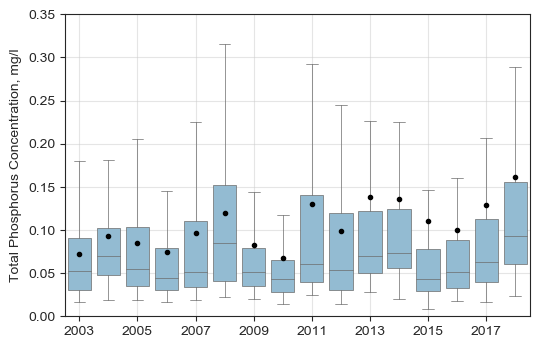

In [398]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(6.5, 22.5)
plt.xticks([int(x) for x in np.linspace(7,21,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,0.35)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')

In [396]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




In [363]:
EGRET_Sample

,Unnamed: 0,Date,Q,LogQ,ConcLow,ConcHigh,Uncen,ConcAve,Julian,Month,...,waterYear,SinDY,CosDY,yHat,SE,ConcHat,Fx_Hat,Fx_C,logCHat,Test
0,1,2007-01-23,6.796043,1.916341,0.115,0.115,1,0.115,57365,1,...,2007,0.378372,0.925654,-2.861364,0.522659,0.065561,38.495836,67.525485,-0.648827,0.057191
1,2,2007-02-22,3.681190,1.303236,0.079,0.079,1,0.079,57395,2,...,2007,0.786093,0.618108,-3.567103,0.499982,0.031997,10.176812,25.126331,-0.693183,0.028238
2,3,2007-03-21,17.584762,2.867033,0.170,0.170,1,0.170,57422,3,...,2007,0.979758,0.200188,-2.475668,0.549615,0.097820,148.619618,258.284978,-0.598538,0.084107
3,4,2007-04-19,4.842181,1.577365,0.018,0.018,1,0.018,57451,4,...,2007,0.956025,-0.293286,-2.909772,0.494117,0.061563,25.755733,7.530559,-0.704982,0.054488
4,5,2007-05-30,1.582912,0.459266,0.030,0.030,1,0.030,57492,5,...,2007,0.537400,-0.843327,-3.657012,0.594062,0.030790,4.210987,4.102907,-0.520771,0.025810
5,6,2007-06-21,1.599902,0.469942,0.026,0.026,1,0.026,57514,6,...,2007,0.187522,-0.982260,-3.263194,0.599992,0.045812,6.332725,3.594019,-0.510840,0.038266
6,7,2007-07-31,0.951446,-0.049772,0.058,0.058,1,0.058,57554,7,...,2007,-0.479363,-0.877616,-3.420226,0.594470,0.039026,3.208125,4.767886,-0.520085,0.032705
7,8,2007-08-27,6.144756,1.815599,0.079,0.079,1,0.079,57581,8,...,2007,-0.821885,-0.569653,-2.098563,0.479182,0.137552,73.027128,41.941644,-0.735675,0.122632
8,9,2007-12-20,18.802386,2.933984,0.104,0.104,1,0.104,57696,12,...,2008,-0.195970,0.980610,-1.875475,0.499324,0.173633,282.070895,168.950720,-0.694500,0.153282
9,10,2008-03-20,148.097107,4.997868,0.209,0.209,1,0.209,57787,3,...,2008,0.979002,0.203852,-0.552526,0.558563,0.672651,8606.961756,2674.278310,-0.582387,0.575494


In [375]:

# EGRET_Sample.groupby('waterYear').mean()

In [388]:
EGRET_Daily_an['Fx_SE']

0     0.028781
1     0.073931
2     0.119609
3     0.015203
4     0.046534
5     0.007924
6     0.041220
7     0.052823
8     0.132211
9     0.160707
10    0.344987
11    0.521227
12    0.365734
13    0.278458
14    0.063911
15    1.296555
16    0.415512
17    3.834638
18    1.379181
19    0.918568
20    0.426239
21    0.877285
22    1.428737
23    1.321949
Name: Fx_SE, dtype: float64

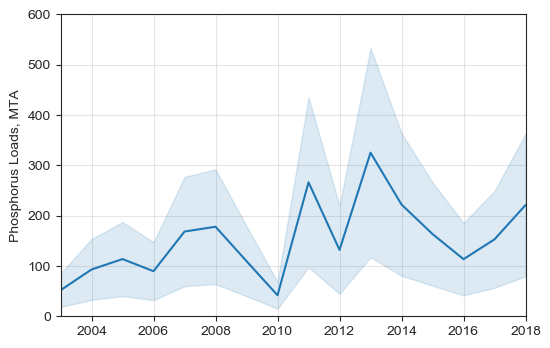

In [404]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]-EGRET_Daily_an['Fx_SE'][5:-1],
                 EGRET_Daily_an['FluxYearMTA'][5:-1]+EGRET_Daily_an['Fx_SE'][5:-1], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2018)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,600)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/Huron_R_OH/Huron_R_OH_PFlux.pdf')


In [397]:
print(EGRET_Daily_an[['waterYear', 'FluxYearMTA','Fx_AE','Fx_SE']].round(1).to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 waterYear &  FluxYearMTA &  Fx\_AE &  Fx\_SE \\
\midrule
      1996 &         45.5 &   30.0 &   29.1 \\
      1997 &         71.9 &   47.4 &   46.5 \\
      1998 &         85.3 &   56.2 &   54.5 \\
      1999 &         22.9 &   15.1 &   14.8 \\
      2000 &         47.1 &   31.0 &   30.1 \\
      2001 &         14.2 &    9.3 &    9.3 \\
      2002 &         40.8 &   26.9 &   26.3 \\
      2003 &         51.7 &   34.1 &   33.3 \\
      2004 &         93.0 &   61.3 &   60.4 \\
      2005 &        113.6 &   74.9 &   73.6 \\
      2006 &         89.6 &   59.1 &   57.5 \\
      2007 &        168.4 &  111.0 &  108.5 \\
      2008 &        177.9 &  117.3 &  113.9 \\
      2009 &        109.5 &   72.2 &   69.6 \\
      2010 &         41.8 &   27.5 &   26.6 \\
      2011 &        266.2 &  175.5 &  168.8 \\
      2012 &        131.8 &   86.9 &   87.2 \\
      2013 &        325.0 &  214.3 &  207.7 \\
      2014 &        222.0 &  146.4 &  141.5 \\
      2015 &      

In [343]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,45.450090,154.927809,0.107491,0.587143,2.451271,22.832016,1419.508013
1997,365.0,71.871339,294.147298,0.232104,2.298074,7.870464,39.297391,3754.870840
1998,365.0,85.259313,420.553422,0.265809,1.327804,6.604827,29.823576,6454.933370
1999,365.0,22.920055,117.362999,0.028755,0.434161,1.148823,4.495965,1851.838402
2000,366.0,47.091098,180.605984,0.208652,1.257016,4.280271,20.609851,2203.257500
2001,365.0,14.174214,61.717835,0.065111,0.555528,1.724630,3.692831,679.087142
2002,365.0,40.780103,179.159069,0.040903,0.646393,2.419541,8.752563,1886.041117
2003,365.0,51.655180,158.595164,0.218792,1.708126,5.774820,27.604075,1471.889983
2004,366.0,92.995694,272.424009,0.581799,4.338649,12.515066,40.086364,2026.102642
